In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from copy import copy
import torch
import pickle

import bionics.biofuzznet.biofuzznet as biofuzznet
import bionics.biofuzznet.utils as utils

/home/ubuntu/storage/miniconda3/envs/bionics/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# The initial data gotten from https://saezlab.github.io/CellNOptR/5_Models%20and%20Documentation/
initial_CNO = pd.read_csv("DREAM_CNO.csv")

initial_CNO

,TR:mock:CellLine,TR:igf1,TR:il1a,TR:tgfa,TR:tnfa,TR:ikki,TR:mek12i,TR:pi3ki,TR:p38i,DA:akt,...,DA:p38,DA:hsp27,DA:mek12,DV:akt,DV:erk12,DV:ikb,DV:jnk12,DV:p38,DV:hsp27,DV:mek12
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN
6,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN
7,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN
8,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN
9,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN


In [3]:
# Remove the rows where some inhibitors are 1
inhibitor_cols =  ["TR:ikki", "TR:mek12i", "TR:pi3ki", "TR:p38i"]
rows_to_remove = []
for row in initial_CNO.index:
    for c in inhibitor_cols:
        if (initial_CNO.loc[row,c]==1) and row not in rows_to_remove:
            rows_to_remove.append(row)

stimuli_CNO = initial_CNO.drop(rows_to_remove)
stimuli_CNO

,TR:mock:CellLine,TR:igf1,TR:il1a,TR:tgfa,TR:tnfa,TR:ikki,TR:mek12i,TR:pi3ki,TR:p38i,DA:akt,...,DA:p38,DA:hsp27,DA:mek12,DV:akt,DV:erk12,DV:ikb,DV:jnk12,DV:p38,DV:hsp27,DV:mek12
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25,1,0,0,0,0,0,0,0,0,30,...,30,30,30,0.2615,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
26,1,0,0,0,1,0,0,0,0,30,...,30,30,30,0.6072,0.0000,0.9978,0.0000,0.0000,0.0000,0.0062
27,1,0,1,0,0,0,0,0,0,30,...,30,30,30,0.0003,0.0000,0.9998,0.9999,0.9999,0.9997,0.7445
28,1,1,0,0,0,0,0,0,0,30,...,30,30,30,0.9259,0.0000,0.0000,0.0000,0.0000,0.0000,0.2321
29,1,0,0,1,0,0,0,0,0,30,...,30,30,30,0.9161,0.8128,0.0000,0.0000,0.9970,0.0000,0.9782


In [4]:
stimuli_CNO.drop(inhibitor_cols, axis = 1, inplace=True)
stimuli_CNO

,TR:mock:CellLine,TR:igf1,TR:il1a,TR:tgfa,TR:tnfa,DA:akt,DA:erk12,DA:ikb,DA:jnk12,DA:p38,DA:hsp27,DA:mek12,DV:akt,DV:erk12,DV:ikb,DV:jnk12,DV:p38,DV:hsp27,DV:mek12
0,1,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1,0,0,0,1,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,1,0,1,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,1,1,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,1,0,0,1,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25,1,0,0,0,0,30,30,30,30,30,30,30,0.2615,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
26,1,0,0,0,1,30,30,30,30,30,30,30,0.6072,0.0000,0.9978,0.0000,0.0000,0.0000,0.0062
27,1,0,1,0,0,30,30,30,30,30,30,30,0.0003,0.0000,0.9998,0.9999,0.9999,0.9997,0.7445
28,1,1,0,0,0,30,30,30,30,30,30,30,0.9259,0.0000,0.0000,0.0000,0.0000,0.0000,0.2321
29,1,0,0,1,0,30,30,30,30,30,30,30,0.9161,0.8128,0.0000,0.0000,0.9970,0.0000,0.9782


In [5]:
pd.Series([1,2,3,4]).transpose()

0    1
1    2
2    3
3    4
dtype: int64

In [6]:
# Add the input combinations that I am interested  in

vector_seen = [[0,0,0,0], [0,0,0,1], [0,1,0,0], [1,0,0,0], [0,0,1,0]]
vector = [0,0,0,0]
my_CNO = stimuli_CNO.copy()
for x in range(16):
    binary_num  = bin(x)[2:].zfill(4)
    vector[0] = int(binary_num[0])
    vector[1] = int(binary_num[1])
    vector[2] = int(binary_num[2])
    vector[3] = int(binary_num[3])
    row_0 = pd.DataFrame([1, vector[0], vector[1], vector[2], vector[3]] + 7*[0] + 7*[np.nan]).transpose()
    row_30 = pd.DataFrame([1, vector[0], vector[1], vector[2], vector[3]] + 7*[30] + 7*[np.nan]).transpose()
    row_0.columns = my_CNO.columns
    row_30.columns = my_CNO.columns
    my_CNO = pd.concat([my_CNO,row_0, row_30], ignore_index = True)
my_CNO
    

,TR:mock:CellLine,TR:igf1,TR:il1a,TR:tgfa,TR:tnfa,DA:akt,DA:erk12,DA:ikb,DA:jnk12,DA:p38,DA:hsp27,DA:mek12,DV:akt,DV:erk12,DV:ikb,DV:jnk12,DV:p38,DV:hsp27,DV:mek12
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,1.0,0.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,0.2615,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,1.0,0.0,0.0,0.0,1.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,0.6072,0.0000,0.9978,0.0000,0.0000,0.0000,0.0062
7,1.0,0.0,1.0,0.0,0.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,0.0003,0.0000,0.9998,0.9999,0.9999,0.9997,0.7445
8,1.0,1.0,0.0,0.0,0.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,0.9259,0.0000,0.0000,0.0000,0.0000,0.0000,0.2321
9,1.0,0.0,0.0,1.0,0.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,0.9161,0.8128,0.0000,0.0000,0.9970,0.0000,0.9782


In [7]:
stimuli_CNO

,TR:mock:CellLine,TR:igf1,TR:il1a,TR:tgfa,TR:tnfa,DA:akt,DA:erk12,DA:ikb,DA:jnk12,DA:p38,DA:hsp27,DA:mek12,DV:akt,DV:erk12,DV:ikb,DV:jnk12,DV:p38,DV:hsp27,DV:mek12
0,1,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1,0,0,0,1,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,1,0,1,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,1,1,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,1,0,0,1,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25,1,0,0,0,0,30,30,30,30,30,30,30,0.2615,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
26,1,0,0,0,1,30,30,30,30,30,30,30,0.6072,0.0000,0.9978,0.0000,0.0000,0.0000,0.0062
27,1,0,1,0,0,30,30,30,30,30,30,30,0.0003,0.0000,0.9998,0.9999,0.9999,0.9997,0.7445
28,1,1,0,0,0,30,30,30,30,30,30,30,0.9259,0.0000,0.0000,0.0000,0.0000,0.0000,0.2321
29,1,0,0,1,0,30,30,30,30,30,30,30,0.9161,0.8128,0.0000,0.0000,0.9970,0.0000,0.9782


In [8]:
my_CNO.to_csv("input_CNO_DREAM.csv", index = None)

In [3]:
pkn = biofuzznet.BioFuzzNet.build_BioFuzzNet_from_file("optimised_structure_DREAM_reduced.sif")

In [4]:
pkn.root_nodes

['igf1', 'il1a', 'tgfa', 'tnfa']

# Generate the data for the BioFuzzNet

In [5]:
simulated_data = pd.read_csv("simulated_data_DREAM_reduced.csv")
simulated_data

,map3k7,mek12,map3k1,mkk4,igf1,ikk,akt,p38,tgfa,pi3k,ras,il1a,erk12,tnfa,hsp27,jnk12,ikb
1,0.000000,0.00000,0.000000,0.000000,0,0.000000,0.000000,0.0000,0,0.000000,0.000000,0,0.00000,0,0.0000,0.00000,0.000000
2,0.330975,0.00000,0.000000,0.000000,0,0.933788,0.342101,0.0000,0,0.200280,0.000000,0,0.00000,1,0.0000,0.00000,0.996425
3,0.709236,0.00000,0.842808,0.978312,0,0.996337,0.000000,0.9998,0,0.000000,0.000000,1,0.00000,0,0.9996,0.99984,0.999824
4,0.000000,0.00000,0.000000,0.000000,1,0.000000,0.879825,0.0000,0,0.540547,0.000000,0,0.00000,0,0.0000,0.00000,0.000000
5,0.000000,0.94509,0.000000,0.000000,0,0.000000,0.843323,0.0000,1,0.488403,0.424259,0,0.90071,0,0.0000,0.00000,0.000000
6,0.330975,0.94509,0.000000,0.000000,0,0.933788,0.891092,0.0000,1,0.559831,0.424259,0,0.90071,1,0.0000,0.00000,0.996425
7,0.709236,0.00000,0.842808,0.978312,0,0.996337,0.342101,0.9998,0,0.200280,0.000000,1,0.00000,1,0.9996,0.99984,0.999824
8,0.709236,0.94509,0.842808,0.978312,0,0.996337,0.843323,0.9998,1,0.488403,0.424259,1,0.90071,0,0.9996,0.99984,0.999824
9,0.709236,0.94509,0.842808,0.978312,0,0.996337,0.891092,0.9998,1,0.559831,0.424259,1,0.90071,1,0.9996,0.99984,0.999824
10,0.330975,0.00000,0.000000,0.000000,1,0.933788,0.931780,0.0000,0,0.649532,0.000000,0,0.00000,1,0.0000,0.00000,0.996425


In [6]:
input_col = ["tgfa", "igf1", "il1a", "tnfa"]
measured_col = [ c for c in simulated_data.columns if c not in input_col]
for c in input_col:
    col = simulated_data[c]
    simulated_data = simulated_data.drop(columns=[c])
    simulated_data.insert(loc=0, column=c, value=col)

simulated_data

,tnfa,il1a,igf1,tgfa,map3k7,mek12,map3k1,mkk4,ikk,akt,p38,pi3k,ras,erk12,hsp27,jnk12,ikb
1,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.0000,0.00000,0.000000
2,1,0,0,0,0.330975,0.00000,0.000000,0.000000,0.933788,0.342101,0.0000,0.200280,0.000000,0.00000,0.0000,0.00000,0.996425
3,0,1,0,0,0.709236,0.00000,0.842808,0.978312,0.996337,0.000000,0.9998,0.000000,0.000000,0.00000,0.9996,0.99984,0.999824
4,0,0,1,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.879825,0.0000,0.540547,0.000000,0.00000,0.0000,0.00000,0.000000
5,0,0,0,1,0.000000,0.94509,0.000000,0.000000,0.000000,0.843323,0.0000,0.488403,0.424259,0.90071,0.0000,0.00000,0.000000
6,1,0,0,1,0.330975,0.94509,0.000000,0.000000,0.933788,0.891092,0.0000,0.559831,0.424259,0.90071,0.0000,0.00000,0.996425
7,1,1,0,0,0.709236,0.00000,0.842808,0.978312,0.996337,0.342101,0.9998,0.200280,0.000000,0.00000,0.9996,0.99984,0.999824
8,0,1,0,1,0.709236,0.94509,0.842808,0.978312,0.996337,0.843323,0.9998,0.488403,0.424259,0.90071,0.9996,0.99984,0.999824
9,1,1,0,1,0.709236,0.94509,0.842808,0.978312,0.996337,0.891092,0.9998,0.559831,0.424259,0.90071,0.9996,0.99984,0.999824
10,1,0,1,0,0.330975,0.00000,0.000000,0.000000,0.933788,0.931780,0.0000,0.649532,0.000000,0.00000,0.0000,0.00000,0.996425


In [ ]:
simulated_data[input_col] = simulated_data[input_col]+1e-9

In [7]:
# Save the simulated data
simulated_data.to_csv("simulated_data_DREAM_for_optimisation.csv")

In [8]:
# Create the input dictionnary

train_rows = [1,2,3,4,5,6,7,8,10,11,13]
test_rows = [9,12,14,15,16]

GT_train = {c : torch.tensor(simulated_data.loc[train_rows,c].values) for c in simulated_data.columns}
GT_test = {c : torch.tensor(simulated_data.loc[test_rows,c].values) for c in simulated_data.columns}
input_train = {c: GT_train[c] for c in input_col}
input_test = {c: GT_test[c] for c in input_col}

In [13]:
# See how similar the 2 datasets are

df_train = simulated_data.loc[train_rows,measured_col]
df_test = simulated_data.loc[test_rows,measured_col]

for row in df_train.index:
    for row2 in df_test.index:
        if df_train.loc[row,:].equals(df_test.loc[row2,:]):
            print(row,row2)

In [4]:
import scipy.special
print(scipy.special.binom(15,5))

3003.0


#  Try to fit a BFZ to my newly simulated data

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
def plot_model_output(model , GT, legend = False, print_rmse = False):
    model.set_network_ground_truth(GT)
    model.sequential_update(model.root_nodes)
    predictions = model.output_states
    ident = np.linspace(0,1,100)
    for node in GT:
        if node not in model.root_nodes:
            plt.scatter(GT[node], predictions[node].detach().numpy(), label = node)
 
    plt.plot(ident, ident, "--k", alpha = 0.2)
    plt.plot(ident, ident+0.05, "--g", alpha = 0.2, label = "5% absolute error")
    plt.plot(ident, ident-0.05, "--g", alpha = 0.2)
    plt.plot(ident, ident+0.1, "--r", alpha = 0.2)
    plt.plot(ident, ident-0.1, "--r", alpha = 0.2, label = "10% absolute error")
    if legend:
        plt.legend(bbox_to_anchor = (1.1, 1.1))
    plt.show()

    if print_rmse:
        print("This is the mean RMSE at this node over all predicted conditions")
        rmse = utils.compute_RMSE_outputs(model, GT)
        for node in rmse:
            print(f"{node}: {rmse[node].detach().item()}")
        print(f"MAX RMSE: {max(rmse.values())}")


In [16]:
train_GT = pickle.load(open("ground_truth_train.p", "rb"))
test_GT = pickle.load(open("ground_truth_test.p", "rb"))

In [17]:
model1 = pickle.load(open("bs3_1/model.p", "rb"))
model2 = pickle.load(open("bs3_2/model.p", "rb"))
model3 = pickle.load(open("bs3_3/model.p", "rb"))
#model4 = pickle.load(open("bs3_4/model.p", "rb"))
#model5 = pickle.load(open("bs3_5/model.p", "rb"))



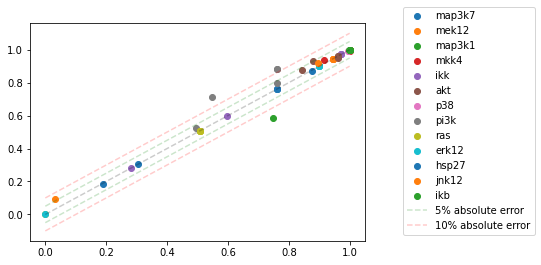

This is the mean RMSE at this node over all predicted conditions
tnfa: 0.0
il1a: 0.0
igf1: 0.0
tgfa: 0.0
map3k7: 0.0017999381968753939
mek12: 0.026701200833788456
map3k1: 0.07460018284733953
mkk4: 0.010113712091301495
ikk: 0.0015817405523650253
akt: 0.029485848113103567
p38: 3.9355383420365206e-05
pi3k: 0.10752532360584384
ras: 0.0011743291657653238
erk12: 0.0005058916383630834
hsp27: 0.0022101622575963578
jnk12: 0.011220928007846171
ikb: 6.986409047718802e-05
MAX RMSE: 0.10752532360584384


In [18]:
plot_model_output(model1, test_GT, legend=True, print_rmse=True)

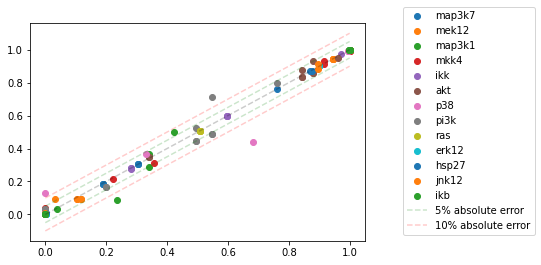

This is the mean RMSE at this node over all predicted conditions
tnfa: 0.0
il1a: 0.0
igf1: 0.0
tgfa: 0.0
map3k7: 0.0020657521165850707
mek12: 0.02219367408358262
map3k1: 0.0539440626178227
mkk4: 0.01903844887670753
ikk: 0.0011837854284151412
akt: 0.023196390694994157
p38: 0.0844094227073634
pi3k: 0.06394736222904802
ras: 0.0019197098267536002
erk12: 0.0003792043713719795
hsp27: 0.002502143136759293
jnk12: 0.006269788905603918
ikb: 0.00011932715524979227
MAX RMSE: 0.0844094227073634


In [19]:
plot_model_output(model1, train_GT, legend=True, print_rmse=True)

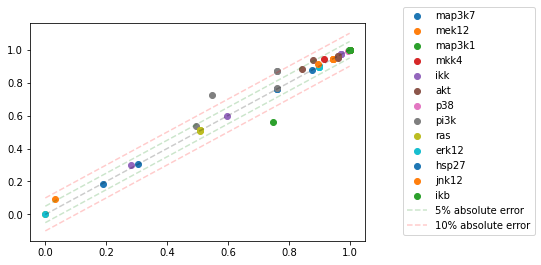

This is the mean RMSE at this node over all predicted conditions
tnfa: 0.0
il1a: 0.0
igf1: 0.0
tgfa: 0.0
map3k7: 0.00038568449606504957
mek12: 0.026162307164156944
map3k1: 0.08467307932846009
mkk4: 0.012797448545322093
ikk: 0.009340130756406486
akt: 0.033257420034552836
p38: 0.0005191691863675782
pi3k: 0.10605279239637881
ras: 0.005184853987928933
erk12: 0.00042290522209225247
hsp27: 0.000810658253886213
jnk12: 0.008504188715057428
ikb: 0.0005572544986169375
MAX RMSE: 0.10605279239637881


In [20]:
plot_model_output(model2, test_GT, legend = True, print_rmse=True)

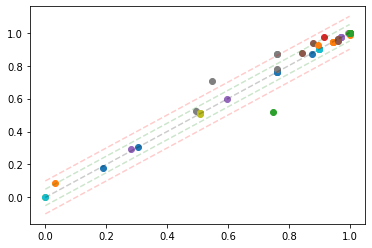

This is the mean RMSE at this node over all predicted conditions
tnfa: 0.0
il1a: 0.0
igf1: 0.0
tgfa: 0.0
map3k7: 0.003313087095773169
mek12: 0.025055526045264283
map3k1: 0.1044679061492556
mkk4: 0.024349430990220983
ikk: 0.004765314783920892
akt: 0.0307309365030862
p38: 0.0013101284050222942
pi3k: 0.1013324558422287
ras: 0.0019174818914900803
erk12: 0.0004985770147171646
hsp27: 0.0021540067944968546
jnk12: 0.014481246109245316
ikb: 0.0002633771744156267
MAX RMSE: 0.1044679061492556


In [21]:
plot_model_output(model3, test_GT, print_rmse=True)

In [22]:
len(model1.biological_nodes)

17

In [23]:
model1.biological_nodes

['mek12',
 'erk12',
 'map3k1',
 'mkk4',
 'p38',
 'ikk',
 'ikb',
 'hsp27',
 'pi3k',
 'ras',
 'map3k7',
 'igf1',
 'il1a',
 'tgfa',
 'tnfa',
 'akt',
 'jnk12']

In [24]:
def get_CV_RMSE(cv_folder, nfolds):
    model_list = [pickle.load(open(f"{cv_folder}model_CV{fold}.p", "rb")) for fold in range(nfolds)]
    ground_truth_list= [pickle.load(open(f"ground_truth_test_CV{fold}.p", "rb")) for fold in range(nfolds)]

    rmse = {}
    for GT in ground_truth_list:
        for model in model_list:
            model.set_network_ground_truth(GT)
            model.sequential_update(model.root_nodes)
        for node in GT:
            if node not in rmse:
                rmse[node] = []
            for model in model_list:
                rmse[node].append(torch.sum((model.nodes()[node]["output_state"] - GT[node])**2))
    for node, val in rmse.items():
        rmse[node] = torch.sqrt(sum(val)/(len(val)*5) )# 5 is the number of datapoints in one test set
    for node in rmse.keys():
        print(node, rmse[node])
    return(rmse)
            

FOLD 0


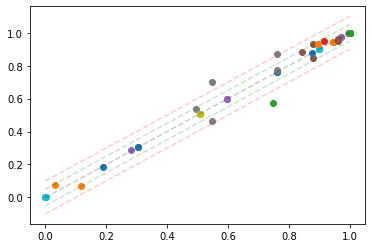

This is the mean RMSE at this node over all predicted conditions
tnfa: 0.0
il1a: 0.0
igf1: 0.0
tgfa: 0.0
map3k7: 0.0011598734015250568
mek12: 0.028079171097104838
map3k1: 0.0791655032280613
mkk4: 0.014781246645236893
ikk: 0.0034852647666227857
akt: 0.034568424718620636
p38: 0.0024109096217187374
pi3k: 0.09331667409436237
ras: 0.00016657733723667126
erk12: 0.0005622973580740646
hsp27: 0.002842048316516294
jnk12: 0.015866165995094602
ikb: 0.0001570443758681085
MAX RMSE: 0.09331667409436237
FOLD 1


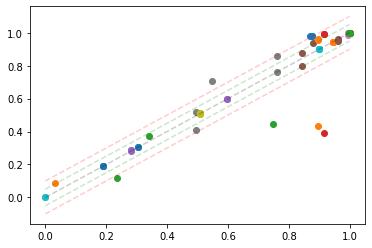

This is the mean RMSE at this node over all predicted conditions
tnfa: 0.0
il1a: 0.0
igf1: 0.0
tgfa: 0.0
map3k7: 0.00018001509010114348
mek12: 0.023680251709224682
map3k1: 0.14544070863315178
mkk4: 0.23763921467881005
ikk: 0.0030763019245937514
akt: 0.03672284655097524
p38: 0.005198912188802273
pi3k: 0.0926051375294656
ras: 0.001933683112555748
erk12: 0.0003186007528547759
hsp27: 0.08372425030027812
jnk12: 0.20969629588988273
ikb: 0.0003173653077360736
MAX RMSE: 0.23763921467881005
FOLD 2


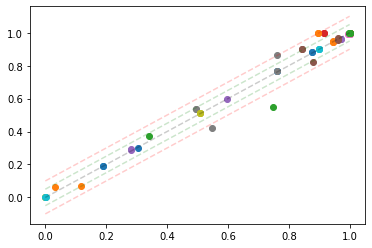

This is the mean RMSE at this node over all predicted conditions
tnfa: 0.0
il1a: 0.0
igf1: 0.0
tgfa: 0.0
map3k7: 0.003476740851991085
mek12: 0.025400276710925252
map3k1: 0.09179658369907776
mkk4: 0.05239231623302743
ikk: 0.009419445633600743
akt: 0.042684696858096255
p38: 0.005610567035343074
pi3k: 0.07801570380132333
ras: 0.002145659135547158
erk12: 0.0009764634611996952
hsp27: 0.00444233904505482
jnk12: 0.06444174219818086
ikb: 0.0005327367999865842
MAX RMSE: 0.09179658369907776
FOLD 3


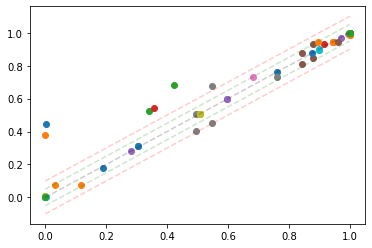

This is the mean RMSE at this node over all predicted conditions
tnfa: 0.0
il1a: 0.0
igf1: 0.0
tgfa: 0.0
map3k7: 0.005810228514667715
mek12: 0.026796099434859014
map3k1: 0.1415932161289934
mkk4: 0.08225492068661357
ikk: 0.0011599030911139834
akt: 0.03583931327836231
p38: 0.021345888652398382
pi3k: 0.08270630439063335
ras: 0.003641606177926806
erk12: 0.0005509798014862397
hsp27: 0.19774460177077832
jnk12: 0.17167269725512085
ikb: 3.2888084982070366e-05
MAX RMSE: 0.19774460177077832
FOLD 4


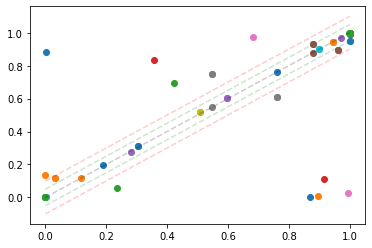

This is the mean RMSE at this node over all predicted conditions
tnfa: 0.0
il1a: 0.0
igf1: 0.0
tgfa: 0.0
map3k7: 0.006050009875680889
mek12: 0.055286592130174825
map3k1: 0.1452627079391321
mkk4: 0.41773063732129795
ikk: 0.004488810418250831
akt: 0.052532157981438884
p38: 0.4502796927519256
pi3k: 0.16237514514047735
ras: 0.00597457117945601
erk12: 0.0016425204191999607
hsp27: 0.5548951127642353
jnk12: 0.40108343200434604
ikb: 9.00851472120479e-05
MAX RMSE: 0.5548951127642353
tnfa tensor(0.)
il1a tensor(0.)
igf1 tensor(0.)
tgfa tensor(0.)
map3k7 tensor(0.0044, grad_fn=<SqrtBackward0>)
mek12 tensor(0.0310, grad_fn=<SqrtBackward0>)
map3k1 tensor(0.0891, grad_fn=<SqrtBackward0>)
mkk4 tensor(0.1401, grad_fn=<SqrtBackward0>)
ikk tensor(0.0046, grad_fn=<SqrtBackward0>)
akt tensor(0.0377, grad_fn=<SqrtBackward0>)
p38 tensor(0.1276, grad_fn=<SqrtBackward0>)
pi3k tensor(0.0933, grad_fn=<SqrtBackward0>)
ras tensor(0.0032, grad_fn=<SqrtBackward0>)
erk12 tensor(0.0008, grad_fn=<SqrtBackward0>)
hsp27

{'tnfa': tensor(0.),
 'il1a': tensor(0.),
 'igf1': tensor(0.),
 'tgfa': tensor(0.),
 'map3k7': tensor(0.0044, grad_fn=<SqrtBackward0>),
 'mek12': tensor(0.0310, grad_fn=<SqrtBackward0>),
 'map3k1': tensor(0.0891, grad_fn=<SqrtBackward0>),
 'mkk4': tensor(0.1401, grad_fn=<SqrtBackward0>),
 'ikk': tensor(0.0046, grad_fn=<SqrtBackward0>),
 'akt': tensor(0.0377, grad_fn=<SqrtBackward0>),
 'p38': tensor(0.1276, grad_fn=<SqrtBackward0>),
 'pi3k': tensor(0.0933, grad_fn=<SqrtBackward0>),
 'ras': tensor(0.0032, grad_fn=<SqrtBackward0>),
 'erk12': tensor(0.0008, grad_fn=<SqrtBackward0>),
 'hsp27': tensor(0.1694, grad_fn=<SqrtBackward0>),
 'jnk12': tensor(0.1397, grad_fn=<SqrtBackward0>),
 'ikb': tensor(0.0003, grad_fn=<SqrtBackward0>)}

In [29]:
cv_folder = "cv_run2/"
for fold in range(5):
    print(f"FOLD {fold}")
    model = pickle.load(open(f"{cv_folder}model_CV{fold}.p", "rb"))
    ground_truth_test = pickle.load(open(f"ground_truth_test_CV{fold}.p", "rb"))
    plot_model_output(model, ground_truth_test, legend = False, print_rmse = True)
get_CV_RMSE(cv_folder, 5)

In [26]:
network = biofuzznet.BioFuzzNet.build_BioFuzzNet_from_file("optimised_structure_DREAM.sif")

In [27]:
utils.has_cycle(network)

(False, [])